<a href="https://colab.research.google.com/github/Abdoo50/Gold-Price-Prediction/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

<ipython-input-1-4bf8d06ebb74>:5: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [7]:
# !pip install pandas_profiling

In [32]:
# Load Dataset from Computer
from google.colab import files
uploaded = files.upload()

Saving gld_price_data.csv to gld_price_data (1).csv


In [3]:
# Read our Data Set
df = pd.read_csv('gld_price_data.csv')

# Data Preprocessing


In [4]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
df.shape

(2290, 6)

In [8]:
# Get the Statistical measures of Data
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
# df = df.set_index('Date')

# Data Cleaning

In [10]:
# Check missing values
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [11]:
# Check duplicated Rows
df.duplicated().sum()

0

# Data Visualization

Correlation
- Positive correlation
- Negative correlation

<ipython-input-12-8a4b47b33fc5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')


<Axes: >

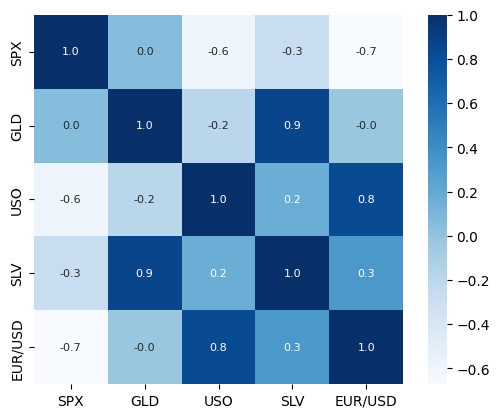

In [12]:
sns.heatmap(df.corr(), cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')

In [13]:
# Correlation of GLD
correlation = df.corr()
correlation['GLD']

<ipython-input-13-1805e36fafac>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

<ipython-input-14-4e83b9b0fe1b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'],color='blue', kde=True)


<Axes: xlabel='GLD', ylabel='Density'>

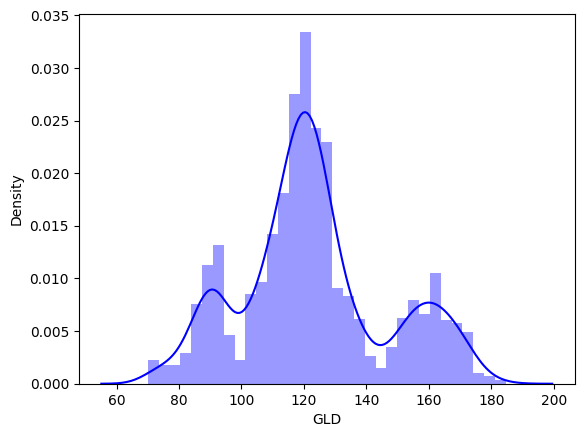

In [14]:
# checking the distribution of the GLD Price
sns.distplot(df['GLD'],color='blue', kde=True)

# EDA(Exploratory Data Analysis)

In [15]:
df['Date'].value_counts()

1/2/2008      1
12/15/2014    1
12/5/2014     1
12/8/2014     1
12/9/2014     1
             ..
6/14/2011     1
6/13/2011     1
6/9/2011      1
6/8/2011      1
5/16/2018     1
Name: Date, Length: 2290, dtype: int64

In [16]:
df['SPX'].value_counts()

1447.160034    2
2268.899902    2
2066.659912    2
2095.840088    2
2373.469971    2
              ..
1278.359985    1
1267.640015    1
1265.420044    1
1287.869995    1
2725.780029    1
Name: SPX, Length: 2277, dtype: int64

In [17]:
df['GLD'].value_counts()

115.940002    5
117.959999    4
122.209999    4
126.300003    4
124.589996    4
             ..
147.179993    1
146.240005    1
145.729996    1
148.339996    1
122.543800    1
Name: GLD, Length: 1930, dtype: int64

In [18]:
df['SLV'].value_counts()

16.150000    11
16.070000     9
15.110000     8
15.910000     8
15.590000     7
             ..
40.580002     1
38.270000     1
33.720001     1
36.980000     1
15.454200     1
Name: SLV, Length: 1331, dtype: int64

In [19]:
df['USO'].value_counts()

33.189999    6
10.110000    6
10.280000    6
36.160000    6
31.780001    5
            ..
41.930000    1
41.130001    1
39.389999    1
40.910000    1
14.405800    1
Name: USO, Length: 1514, dtype: int64

In [20]:
df['EUR/USD'].value_counts

<bound method IndexOpsMixin.value_counts of 0       1.471692
1       1.474491
2       1.475492
3       1.468299
4       1.557099
          ...   
2285    1.186789
2286    1.184722
2287    1.191753
2288    1.193118
2289    1.182033
Name: EUR/USD, Length: 2290, dtype: float64>

# Split Data

Spliting Data into Feature and Target variable

In [21]:
X = df.drop(['Date','GLD'], axis=1)
y = df['GLD']

Splitting into Training data and Test Data

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2)

# Model Training:
- Random Forest Regressor

In [23]:
model = RandomForestRegressor(n_estimators=100)

In [24]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [25]:
# Testing Model
test_prediction = model.predict(X_test)

In [26]:
test_prediction

array([168.5059999 ,  82.21719984, 115.82739973, 127.66220078,
       120.63640128, 154.6536981 , 149.86269786, 126.02360067,
       117.46349883, 125.86520154, 116.83040102, 171.89820097,
       141.60069802, 167.86709792, 115.21680001, 117.57540062,
       138.39270309, 170.26740058, 159.67010334, 159.89799977,
       155.16710077, 125.00330006, 175.47299968, 157.49580353,
       125.16090042,  93.69419992,  78.06880007, 120.47890005,
       119.19690005, 167.45409989,  88.12740065, 125.10619999,
        91.18270074, 117.61280028, 121.03759931, 136.08300104,
       115.56960151, 114.93260066, 146.69599943, 107.39580097,
       104.63610283,  87.36789833, 126.51250089, 117.9417995 ,
       152.15959859, 119.50710007, 108.30359985, 107.93069811,
        93.13370058, 127.04979783,  75.57260032, 113.55859923,
       121.32969982, 111.32849885, 118.94889901, 120.85049922,
       159.09309928, 169.4649002 , 146.89159696,  85.82649838,
        94.32950041,  86.85219876,  90.36130012, 119.02

In [27]:
# R squared error
error_score = metrics.r2_score(y_test, test_prediction)
print("R squared error : ", error_score)

R squared error :  0.9890058190566674


In [28]:
import sklearn.metrics
mse = sklearn.metrics.mean_squared_error(test_prediction, y_test)
mse

5.7988092835704395

In [29]:
y_test = list(y_test)

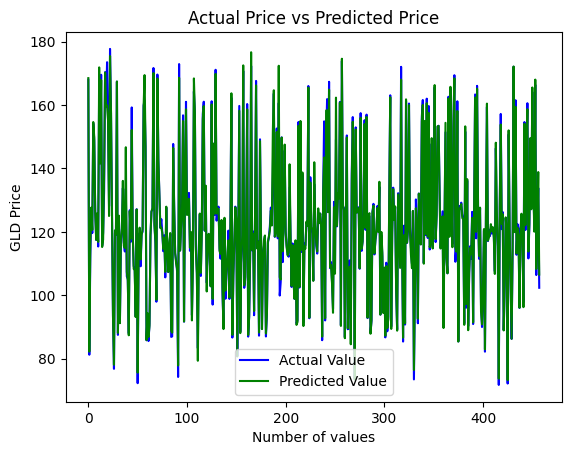

In [30]:
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(test_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()